In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from conaf_func import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams.update({
    "font.family": "serif",
})
matplotlib.rcParams["text.usetex"] = True

In [2]:
file = "Base de datos_IIFF_2009_2018.xlsx"
excel_file = pd.ExcelFile(file)

In [3]:
sheets = excel_file.sheet_names

In [4]:
len(sheets)

10

In [5]:
sheets

['2018-2019',
 '2017-2018',
 '2016-2017',
 '2015-2016',
 '2014-2015',
 '2013-2014',
 '2012-2013',
 '2011-2012',
 '2010-2011',
 '2009-2010']

In [6]:
df = pd.read_excel(excel_file, sheet_name=sheets[0])

In [7]:
regiones = df["Región"].unique()
regiones

array(['Tarapacá', 'Atacama', 'Coquimbo', 'Valparaíso', "O'Higgins",
       'Maule', 'Biobío', 'Ñuble', 'Araucanía', 'Los Lagos', 'Aysén',
       'Magallanes', 'Metropolitana', 'Los Ríos', 'Arica y Parinacota'],
      dtype=object)

In [8]:
len(regiones)

15

In [9]:
df.groupby("Región").count().sort_values("Provincia", ascending=False)

,Provincia,Comuna,Número regional,Nombre,UTM E,UTM N,Lat,Lon,Superficie total,Inicio
Región,,,,,,,,,,
Biobío,1026,1026,1026,1026,1026,1026,1026,1026,1026,1026
Araucanía,919,919,919,919,919,919,919,919,919,919
Valparaíso,905,905,905,905,905,905,905,905,905,905
Maule,848,848,848,848,848,848,848,848,848,848
Metropolitana,532,532,532,532,532,532,532,532,532,532
Ñuble,344,344,344,344,344,344,344,344,344,344
O'Higgins,339,339,339,339,339,339,339,339,339,339
Los Lagos,135,135,135,135,135,135,135,135,135,135
Los Ríos,89,89,89,89,89,89,89,89,89,89


# ALL YEARS ANALYSIS

In [4]:
DFS = [pd.read_excel(excel_file, sheet_name=s) for s in sheets]

In [11]:
len(DFS)

10

In [5]:
df = pd.concat(DFS)

In [6]:
df.groupby("Región").count().sort_values("Provincia", ascending=False)

,Provincia,Comuna,Número regional,Nombre,UTM E,UTM N,Lat,Lon,Superficie total,Inicio
Región,,,,,,,,,,
Valparaíso,8710,8710,8710,8710,8298,8298,8298,8298,8710,8710
Biobío,7685,7685,7685,7685,7685,7685,7685,7685,7685,7685
Maule,4926,4926,4926,4926,4924,4924,4924,4924,4926,4926
Araucanía,4786,4786,4786,4786,4785,4785,4785,4785,4786,4786
Metropolitana,4118,4118,4118,4118,4114,4114,4114,4114,4118,4118
Ñuble,2540,2540,2540,2540,2540,2540,2540,2540,2540,2540
O'Higgins,2318,2318,2318,2318,2302,2302,2302,2302,2318,2318
Los Lagos,1791,1791,1791,1791,1666,1666,1666,1666,1791,1791
Los Ríos,763,763,763,763,761,761,761,761,763,763


In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(38320, 11)

In [16]:
df["Región"].unique()

array(['Tarapacá', 'Atacama', 'Coquimbo', 'Valparaíso', "O'Higgins",
       'Maule', 'Biobío', 'Ñuble', 'Araucanía', 'Los Lagos', 'Aysén',
       'Magallanes', 'Metropolitana', 'Los Ríos', 'Arica y Parinacota'],
      dtype=object)

In [17]:
df.head()

,Región,Provincia,Comuna,Número regional,Nombre,UTM E,UTM N,Lat,Lon,Superficie total,Inicio
0,Tarapacá,Tamarugal,Pozo Almonte,1,BARRANCO,476798 E,7780615 S,"20°04'17"" S","69°13'19"" O",1.000,10-jul-2018 10:50
1,Tarapacá,Tamarugal,Pica,2,ALTO MIRAFLORES,466489 E,7735244 S,"20°28'52"" S","69°19'17"" O",0.038,18-nov-2018 14:00
2,Atacama,Huasco,Vallenar,1,HACIENDA VENTANAS,315151 E,6844353 S,"28°30'52"" S","70°53'20"" O",26.500,18-ago-2018 17:00
3,Atacama,Huasco,Alto del Carmen,2,PLACETA,364472 E,6812951 S,"28°48'14"" S","70°23'20"" O",0.500,21-ago-2018 16:45
4,Atacama,Huasco,Freirina,3,LOS GUINDOS,316159 E,6841718 S,"28°32'18"" S","70°52'44"" O",0.400,20-oct-2018 15:00


## MAGNITUDE DISTRIBUTION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from conaf_func import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams.update({
    "font.family": "serif",
})
matplotlib.rcParams["text.usetex"] = True

In [3]:
file = "Base de datos_IIFF_2009_2018.xlsx"
excel_file = pd.ExcelFile(file)
sheets = excel_file.sheet_names
DFS = [pd.read_excel(excel_file, sheet_name=s) for s in sheets]
df = pd.concat(DFS)
df.dropna(inplace=True)

In [4]:
surfaces = df["Superficie total"]
min_val = surfaces.min()
max_val = surfaces.max()
bins = np.logspace(np.log10(min_val), np.log10(max_val), num=30)
h, b = np.histogram(df["Superficie total"], bins=bins, density=True)

In [25]:
x, y, params = XY_fit(b[17:-1], h[17:], x_range=[0.1, 2*1e5])

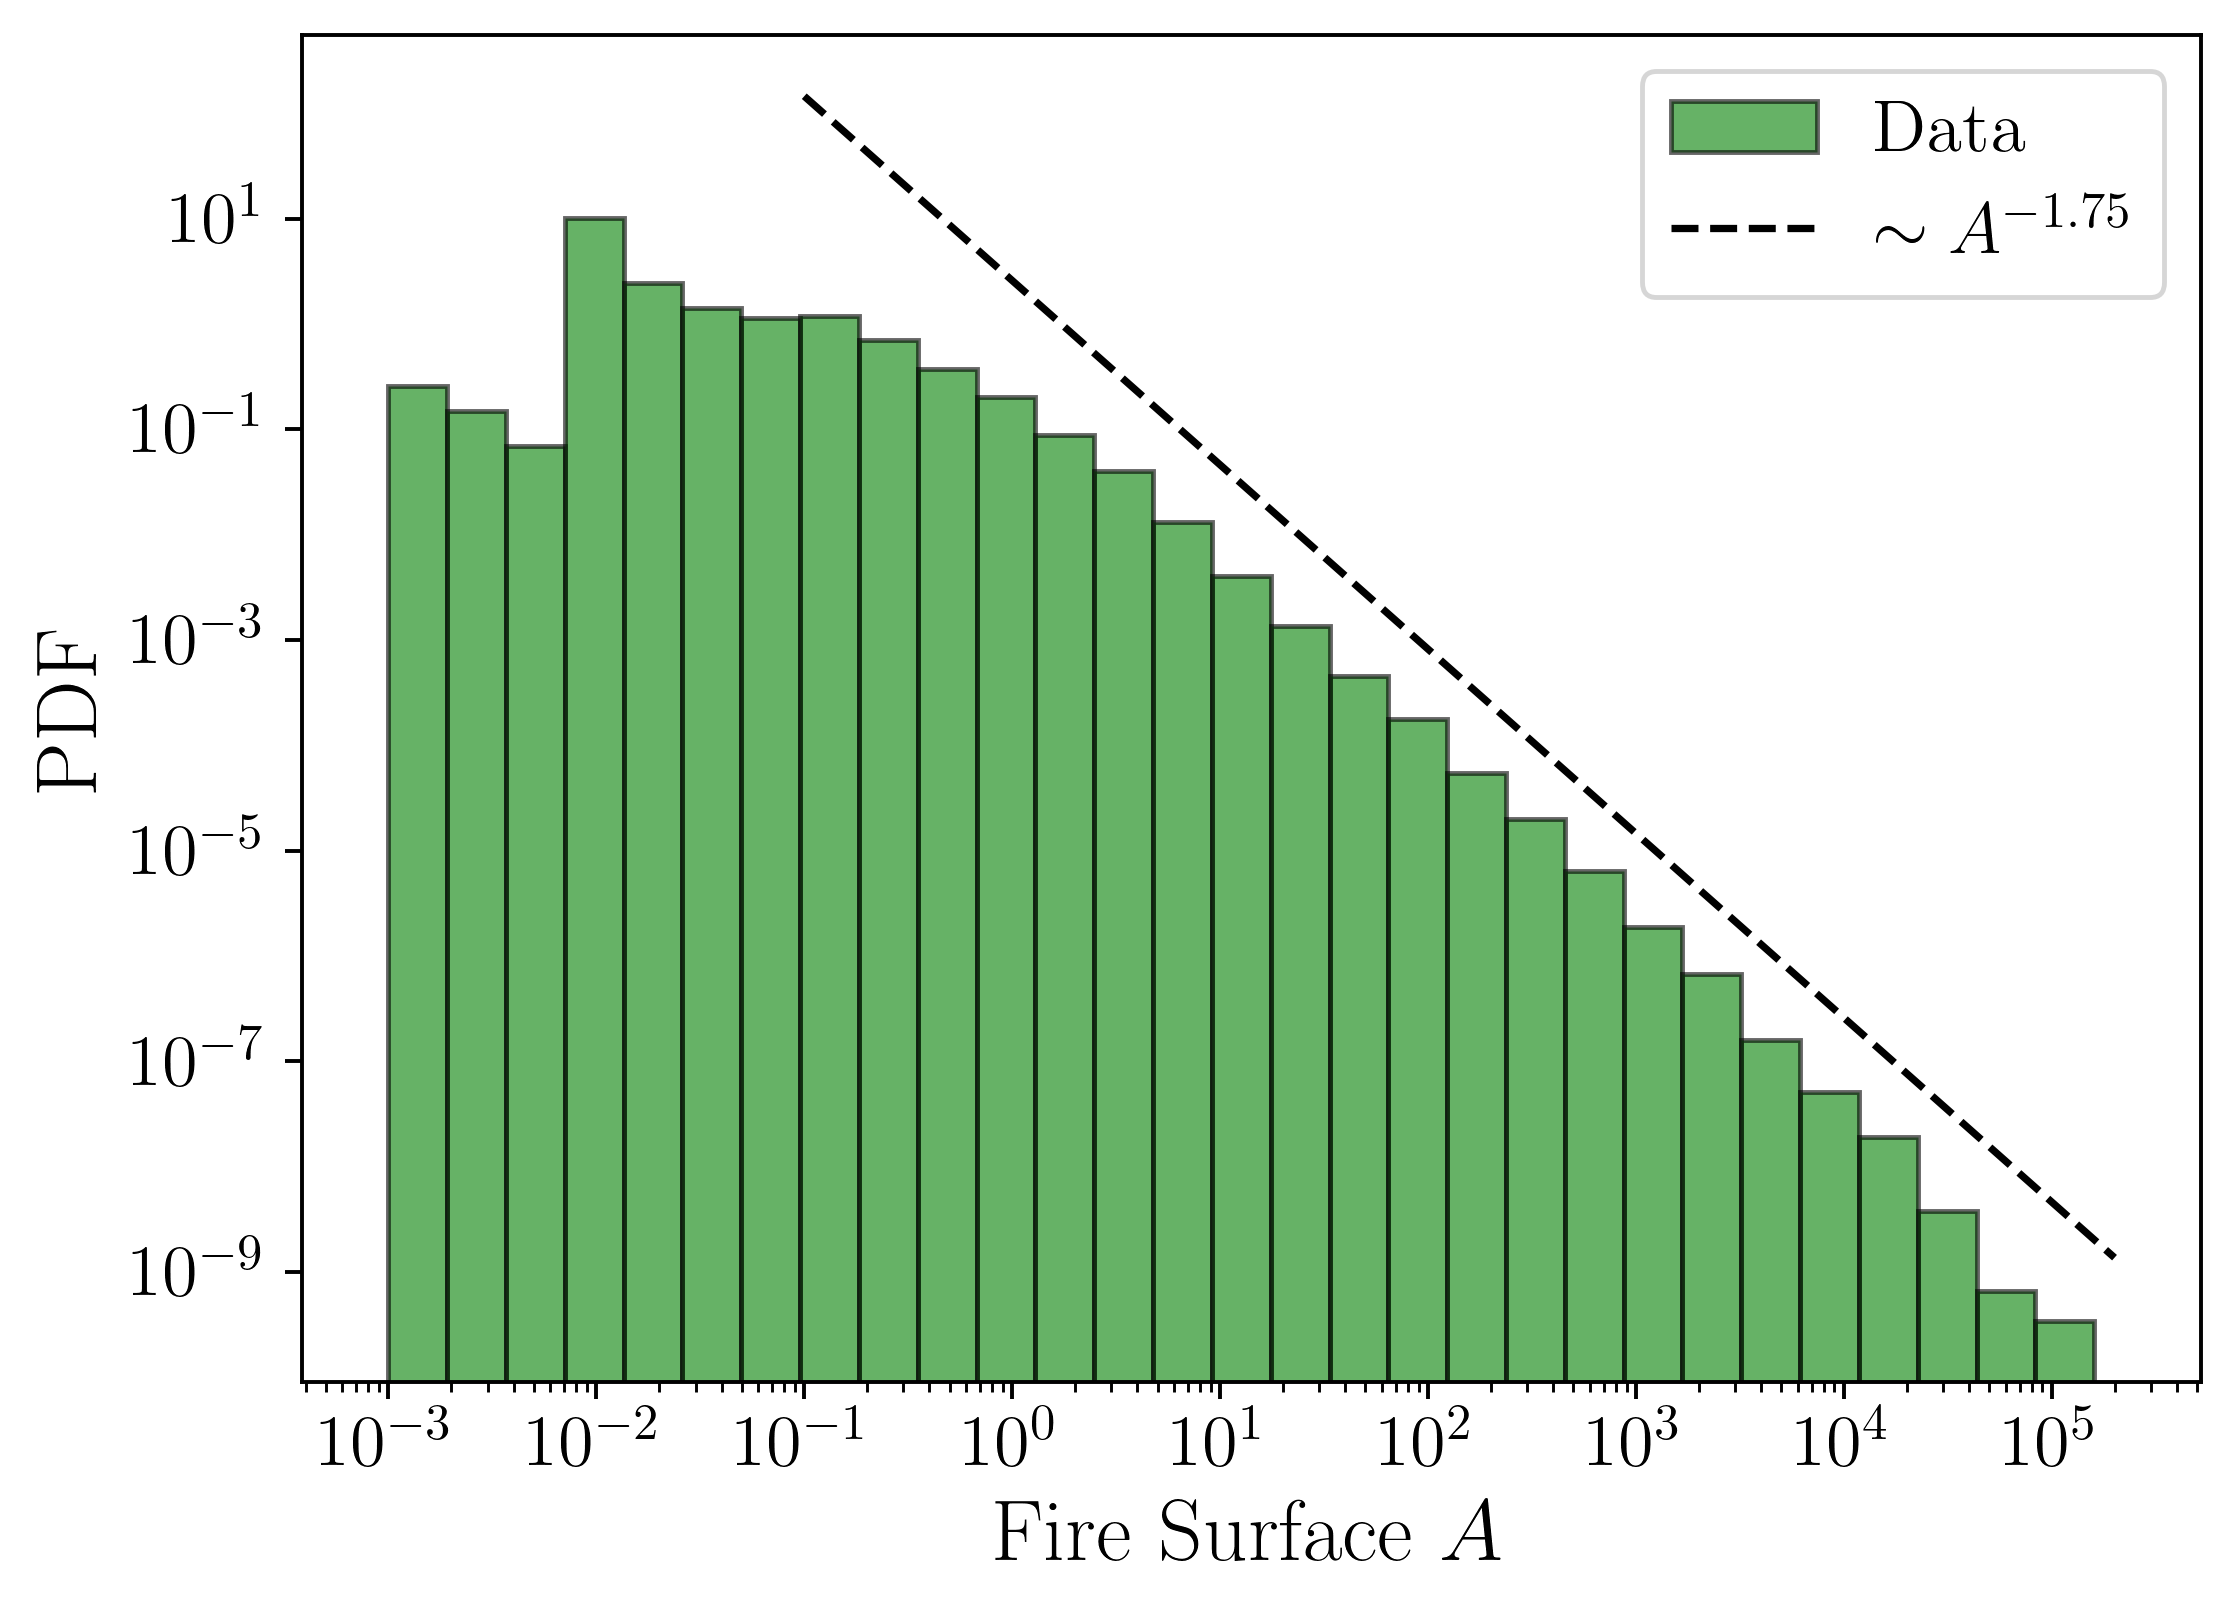

In [26]:
plt.figure(dpi=350, figsize=(7,5))

plt.hist(surfaces, bins=bins, density=True, alpha=0.6, color='g', edgecolor='black', label="Data")
plt.plot(x, y*10, "k--", label=fr"$\sim A^{{{round(params[-1],2)}}}$")

# X axis
plt.xlabel('Fire Surface $A$', fontsize=18)
plt.xticks(size=15)
plt.xscale('log')

# Y axis
plt.ylabel('PDF', fontsize=18)
plt.yticks(size=15)
plt.yscale('log')

#plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend(loc="upper right", fontsize=15)
plt.show()

In [27]:
df["dLat"] = df["Lat"].apply(lambda x: dms_to_decimal(x))
df["dLon"] = df["Lon"].apply(lambda x: dms_to_decimal(x))